## Rubric

1. Read in the data, (1 point)
1. What does the data = data.reset_index() do? (1 point)
1. Add a new column inum to data (2 points)
3. Choose rows in data2 with inum modulo 1009 (2 points)
3. Analysis Validation (1 point)
4. What countries are represented in data3 (1 point)
5. Aggregate values for data3 by Country (2 points)

# Analyzing Retail Data using Pandas

This exercise involves processing a sampled dataset from a UK-based online retailer.
The original dataset has over a million records &mdash; Excel won't even let you load it!
Pandas will let you load it and process it but, in the interest of not overloading our server, we'll only work with about 0.1% of the rows.
1. Read in the data from the dataset `online_retail_II.csv`. 
A fair number of the records are bad &mdash; having null or empty fields where there should be data. Just throw those records away at the outset using `dropna()`.
1. Sample invoice numbers by computing the remainder after dividing by 1009 (the smallest prime number greater than 1000). 
If the remainder is zero, choose the invoice, otherwise throw it away.
1. But there are a couple of wrinkles to keep in mind:
    * An invoice represents a shopping cart and it can contain multiple items. 
    If we want to keep an invoice in our sampling, we must keep all items in that shopping cart.
    If we want to not keep it, we must not keep any of the items in it.
    * Some invoice numbers start with a "C." Invoice number C123456 is to be interpreted as a return of items in invoice 123456.
    If we want to keep an invoice in our sampled dataset, we must also keep its corresponding return, if one exists.

In [1]:
import pandas as pd

## 1. Read in the data

The code for initial reading of the data is provided in the next cell. You need only run it!

In [3]:
data = pd.read_csv('online_retail_II.csv', encoding='utf-8')
data.dropna(inplace=True)
data = data.reset_index().drop('index',axis=1)
data['Total'] = data['Price'] * data['Quantity']
data.rename(columns={"Customer ID": "CustomerID"}, errors="raise", inplace=True)
print ("Incoming rows:", len(data), "Incoming customers:", len(data['CustomerID'].unique()))
data

Incoming rows: 824364 Incoming customers: 5942


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,14.85


## 1a. What does the `data = data.reset_index()`&hellip; line above do?

**Your Answer** 

---

## 2. Add a new column `inum` to `data`&hellip;

The new column `inum` should be the Invoice number if it is a regular invoice and have the "C" tripped out if it is a return. Hint: Use [`pandas.DataFrame.apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html).

Write the result into a new dataframe `data2`.

In [4]:
def raw_num(invoice):
    if str(invoice).startswith('C'):
        return invoice[1:]
    else:
        return invoice

data2 = data.assign(inum = data['Invoice'].apply(raw_num))
data2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Total,inum
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,83.40,489434
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.00,489434
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.00,489434
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,100.80,489434
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,30.00,489434
...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60,581587
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60,581587
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60,581587
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,14.85,581587


## 3. Choose rows in `data2` with `inum modulo 1009 == 0`

Store the result in a new dataframe `data3`.

In [5]:
data3 = data2[(data2['inum'].astype(int) % 1009) == 0] 
data3

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Total,inum
9093,490374,20685,RED SPOTTY COIR DOORMAT,4,12/5/2009 12:36,6.75,14239.0,United Kingdom,27.0,490374
9094,490374,48189,DOOR MAT FRIENDSHIP,2,12/5/2009 12:36,6.75,14239.0,United Kingdom,13.5,490374
9095,490374,84836,ZINC METAL HEART DECORATION,12,12/5/2009 12:36,1.25,14239.0,United Kingdom,15.0,490374
9096,490374,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,12,12/5/2009 12:36,0.95,14239.0,United Kingdom,11.4,490374
9097,490374,20982,12 PENCILS TALL TUBE SKULLS,12,12/5/2009 12:36,0.85,14239.0,United Kingdom,10.2,490374
...,...,...,...,...,...,...,...,...,...,...
820878,581184,22221,CAKE STAND LOVEBIRD 2 TIER PINK,6,12/7/2011 16:24,2.95,12569.0,Germany,17.7,581184
820879,581184,22475,SKULL DESIGN TV DINNER TRAY,8,12/7/2011 16:24,1.95,12569.0,Germany,15.6,581184
820880,581184,22776,SWEETHEART 3 TIER CAKE STAND,2,12/7/2011 16:24,9.95,12569.0,Germany,19.9,581184
820881,581184,POST,POSTAGE,2,12/7/2011 16:24,18.00,12569.0,Germany,36.0,581184


## 3a. Analysis Validation

1. How many rows are in `data3`?
2. All things being equal, because of the modulo 1009 calculation, what would you expect the row count for `data3` to be?
3. Is the number of rows in `data3` consistent with what you might have expected?

---

## 4. What countries are represented in `data3`?

In [6]:
data3[['Country']].drop_duplicates()

,Country
9093,United Kingdom
129224,EIRE
451254,France
820878,Germany


In [7]:
data3['Country'].unique()

array(['United Kingdom', 'EIRE', 'France', 'Germany'], dtype=object)

## 5. Aggregate values for `data3` by Country

Show the minimum, maximum, mean, count and sums for the invoices by Country

In [8]:
data3.groupby(['Country']).Total.agg(['min', 'max', 'mean', 'count', 'sum'])

,min,max,mean,count,sum
Country,,,,,
EIRE,8.50,142.8,27.125000,40,1085.00
France,5.04,39.6,19.426154,13,252.54
Germany,15.60,36.0,21.380000,5,106.90
United Kingdom,-29.90,876.0,23.290633,821,19121.61


## 6. Dataset Problem

Now we are introducing a new dataset which is the countries.csv which we will use to get latitude and longitude data.

Make sure to inspect your data frame that reads from this new dataset makes sure it is correct. You may notice something weird going on here with "\t" appearing places. Try googling what "\t" in computer programming is if you are not aware, and see if you need to do anything different to fix it.

How are you going to handle imperfect merging between the datasets?

One of the TA's with no knowledge what so ever about life happiness randomly proposes that the Happiness score could instead be calculated as:

\\(( \text{LogGDP} + \text{HealthyLifeExpectancyAtBirth}^2 \\))

Make this change and replace the old Happiness score with this new measure.

Lastly we want to plot the happiness of different countries using a bubble sized based on there happiness, use the provided plotting function we provided.

Our countries.csv is attributed at: https://developers.google.com/public-data/docs/canonical/countries_csv

under creative commons 4: https://creativecommons.org/licenses/by/4.0/

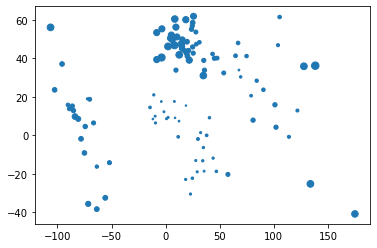

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

def plot_bubbles(lattitude, longitude, happy): # expect pandas objects
    plt.scatter(lattitude, longitude, s=np.exp(happy/1000)/5)
    plt.show()






df_country = pd.read_csv("countries.csv", delimiter='\t')
df_happy = pd.read_csv("happiness-report.csv")

df_happy = df_happy.dropna()

df_happy['name'] = df_happy['Country']
df_happy.loc[:, 'HappinessScore'] = df_happy["LogGDP"] + df_happy["HealthyLifeExpectancyAtBirth"]**2

df = pd.merge(left=df_country, right=df_happy, how='inner', on='name')

y_pos = df["latitude"]
x_pos = df["longitude"]

sizes = df["HappinessScore"]


plot_bubbles(x_pos, y_pos, sizes)

Given a new country British Virgin Islands, we do not have happiness data on but there is data in the countries.csv for longitude and lattidude for it, can we give it a happiness using the average of the 5 closest countries.

We measure the distance between 2 countries by:
\\(( \sqrt{\text{difference in lattitudes}^2 + \text{difference in longitudes}} \\))

Another caveat you might notice is that even when we select for a single value in a cell of your dataframe you do not get the exact value but a pandas (1x1) object, so for broadcasting you will have issues so it is not treated as a scalar. To get the exact scalar value we can use the to_numpy() function to get our 1x1 pandas to a numpy array of size 1 to retrieve our value.

Example: 

x = df.DataFrame({"hello": [1]})

y = x["hello"]

z = y.to_numpy()[0]

Hint: create a new column to store distance calculation and google if you can sort the dataframe somehow using our new column

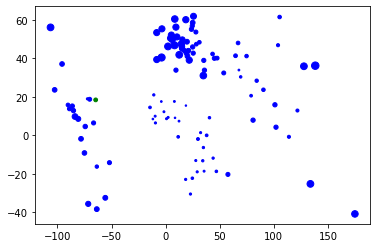

In [6]:
def plot_with_new_data(old_longitude, old_lattitude, old_happiness, virgin_longitude, virgin_lattitude, virgin_happy):
    new_happiness = old_happiness.to_numpy().flatten()
    new_happiness = np.hstack([new_happiness, [virgin_happy]])

    new_lattitude = old_lattitude.to_numpy().flatten()
    new_lattitude = np.hstack([new_lattitude, [virgin_lattitude]])
    
    new_longitude = old_longitude.to_numpy().flatten()
    new_longitude = np.hstack([new_longitude, [virgin_longitude]])

    c = np.repeat(['b'], old_longitude.to_numpy().shape[0]+1)
    c[-1] = 'g'



    plt.scatter(new_longitude, new_lattitude, s=np.exp(new_happiness/1000)/5, c=c)
    plt.show()


new_country = "British Virgin Islands"

x = df_country[df_country.name == new_country]

lat = df_country[df_country.name == new_country]["latitude"].to_numpy()[0]
long = df_country[df_country.name == new_country]["longitude"].to_numpy()[0]

df["distance"] = (df["latitude"]-lat)**2 + (df["longitude"]-long)**2
df = df.sort_values('distance', ascending=True)

new_happy = df["HappinessScore"][:5].mean()

plot_with_new_data(x_pos, y_pos, sizes, long, lat, new_happy)

You may have realised from earlier exercises that the location of the bubbles correspond the the actual locations of the bubble's countries on a map. If you have done it correctly you will notice a new green dot for the British Virgin Islands. You can verify if it is correct by googling where the British Virgin Islands are located to check that the location on the map is correct. Additionally you can check the size of the green dot is correct by seeing if it is about the average size of the 5 nearest points.

![The end](https://live.staticflickr.com/32/89187454_3ae6aded89_b.jpg)